### Library
### Load file
### Data prepared
### Test Preprocess

In [9]:
############################################################### Import necessary libraries, including matplotlib for plotting purposes.
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import string
############################################################### Define the file path to the text file containing the data for processing.
file_path_AG = 'ArmanGolbidi.txt'
############################################################### This step involves text preprocessing, which is critical for cleaning and standardizing the data.
def preprocessText_AG(file_path_AG):
    with open(file_path_AG, 'r') as file_AG:
        text_AG = file_AG.read().lower()
    text_AG = ''.join([char_AG for char_AG in text_AG if char_AG in string.ascii_lowercase + ' '])
    words_AG = text_AG.split()
    return words_AG
############################################################### Call the preprocessing function and display the first 10 words from the processed data.
words_AG = preprocessText_AG(file_path_AG)
print("First 10 words in the text:", words_AG[:10])


First 10 words in the text: ['the', 'call', 'of', 'the', 'wildby', 'jack', 'londonchapter', 'i', 'into', 'the']


### first probability to start
### Use first function
### TR Function
### Use TR function

In [10]:
################################################################ Define a function to calculate the probabilities of letters being the first letter of words.
def computeInitialProbabilities_AG(words_AG):
    first_letters_AG = [word_AG[0] for word_AG in words_AG if word_AG]  # Extract the first letter of each word
    counts_AG = Counter(first_letters_AG)
    total_AG = sum(counts_AG.values())
    initialProbabilities_AG = {letter_AG: count_AG / total_AG for letter_AG, count_AG in counts_AG.items()}
    return initialProbabilities_AG
############################################################### Call the function to compute initial probabilities and display the results.
pi_AG = computeInitialProbabilities_AG(words_AG)
print("Initial state probabilities for letters:", pi_AG)
############################################################### Define a function to compute transition probabilities between consecutive letters in words.
def computeTransitionProbabilities_AG(words_AG):
    transitions_AG = defaultdict(Counter)
    for word_AG in words_AG:
        for i_AG in range(len(word_AG) - 1):
            transitions_AG[word_AG[i_AG]][word_AG[i_AG + 1]] += 1

    transitionProbabilities_AG = {}
    for letter_AG, next_letters_AG in transitions_AG.items():
        total_AG = sum(next_letters_AG.values())
        transitionProbabilities_AG[letter_AG] = {next_letter_AG: count_AG / total_AG for next_letter_AG, count_AG in next_letters_AG.items()}
    return transitionProbabilities_AG
############################################################### Call the transition probabilities function and display a portion of the results for verification.
aij_AG = computeTransitionProbabilities_AG(words_AG)
print("Sample transition probabilities between letters:", dict(list(aij_AG.items())[:5]))


Initial state probabilities for letters: {'t': 0.17454333596079372, 'c': 0.03523081668323109, 'o': 0.0609342335241098, 'w': 0.07998903320881456, 'j': 0.004626615031358168, 'l': 0.02858219952705713, 'i': 0.04547791219712807, 'p': 0.02241337948524624, 'n': 0.022104938483155694, 'a': 0.11857842969258714, 'f': 0.04520374241749203, 'b': 0.05572500771102505, 's': 0.06826827512937386, 'd': 0.037115733918228866, 'r': 0.02056273347270297, 'h': 0.09109290928407417, 'k': 0.006203091264265396, 'e': 0.014496727098255596, 'm': 0.03194077932759862, 'g': 0.015079337879982179, 'y': 0.005037869700812228, 'v': 0.003461393467905, 'u': 0.011412317077350149, 'q': 0.0017821035676342575, 'z': 0.00013708488981801982}
Sample transition probabilities between letters: {'t': {'h': 0.48600143575017946, 'e': 0.10460465593272485, 'o': 0.12408983693980105, 'i': 0.06850579427751, 's': 0.021741359860527127, 'r': 0.05168700646087581, 'a': 0.03763716541893139, 'b': 0.0033842682801763922, 't': 0.023279663624243666, 'u': 0.

###  plot for probabilies 
###  TR Probabilities information and plot 

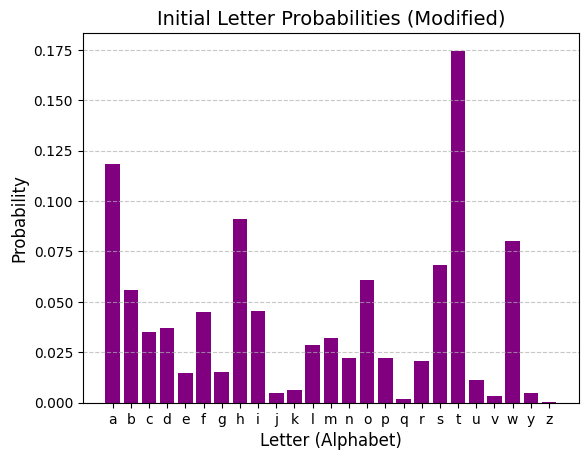

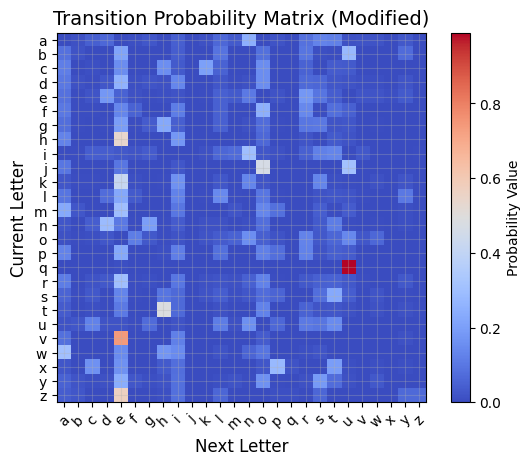

In [11]:
############################################################### Plot the initial probabilities as a bar chart with customized colors and labels.
def plotInitialProbabilities_AG(pi_AG):
    letters_AG = sorted(pi_AG.keys())
    probabilities_AG = [pi_AG[letter_AG] for letter_AG in letters_AG]
    plt.bar(letters_AG, probabilities_AG, color='purple')  # Changed bar color to purple
    plt.title("Initial Letter Probabilities (Modified)", fontsize=14)
    plt.xlabel("Letter (Alphabet)", fontsize=12)
    plt.ylabel("Probability", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plotInitialProbabilities_AG(pi_AG)
############################################################### Plot the transition matrix using a heatmap with modified color scheme and labels.
def plotTransitionMatrix_AG(aij_AG):
    letters_AG = sorted(aij_AG.keys())
    matrix_AG = np.zeros((len(letters_AG), len(letters_AG)))
    for i_AG, letter_AG in enumerate(letters_AG):  # Fill the matrix with transition probabilities
        for j_AG, next_letter_AG in enumerate(letters_AG):
            matrix_AG[i_AG, j_AG] = aij_AG.get(letter_AG, {}).get(next_letter_AG, 0)

    plt.imshow(matrix_AG, cmap='coolwarm', interpolation='nearest')  # Changed heatmap color scheme
    plt.title("Transition Probability Matrix (Modified)", fontsize=14)
    plt.xlabel("Next Letter", fontsize=12)
    plt.ylabel("Current Letter", fontsize=12)
    plt.colorbar(label="Probability Value")
    plt.xticks(range(len(letters_AG)), letters_AG, fontsize=10, rotation=45)
    plt.yticks(range(len(letters_AG)), letters_AG, fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()
plotTransitionMatrix_AG(aij_AG)
